In [7]:
# Imports

import numpy as np
import pathlib
import matplotlib.pyplot as plt
import IPython
import sys
import cv2
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL.Image
from PIL import ImageOps
import PIL
import datetime
import tensorboard
import sklearn
from sklearn.linear_model import LogisticRegressionCV
import subprocess
import dataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Datasets

traindata_path = r'/home/samer/Downloads/MulticlassLR/Training/'

testdata_path = r'/home/samer/Downloads/MulticlassLR/Testing/'

train_set, train_class, train_cars, train_car_class, train_mris, train_mris_class, train_shoe, train_shoe_class = dataset.train_dataset(traindata_path)
test_set, test_class, test_cars, test_car_class, test_mris, test_mris_class, test_shoe, test_shoe_class = dataset.test_dataset(testdata_path)


(1937,)
shape of train dataset =  (1937, 100, 100, 3)
shape of test dataset =  (629, 100, 100, 3)


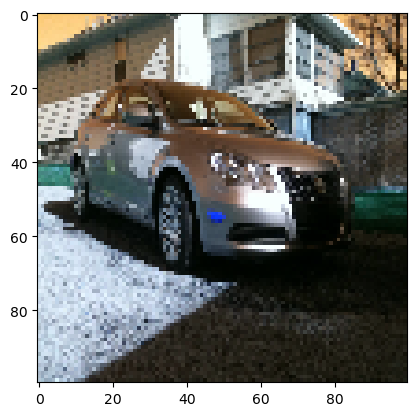

In [9]:
# visualization

print(train_class.shape)
print("shape of train dataset = ", train_set.shape)
print("shape of test dataset = ", test_set.shape)
plt.imshow(train_set[15])

In [10]:
# preprocessing

train_set_flatten = train_set.reshape(train_set.shape[0],-1).T
train_cars_flatten = train_cars.reshape(train_cars.shape[0],-1).T
train_mris_flatten = train_mris.reshape(train_mris.shape[0],-1).T
train_shoe_flatten = train_shoe.reshape(train_shoe.shape[0],-1).T
test_set_flatten = test_set.reshape(test_set.shape[0],-1).T
test_cars_flatten = test_cars.reshape(test_cars.shape[0],-1).T
test_mris_flatten = test_mris.reshape(test_mris.shape[0],-1).T
test_shoe_flatten = test_shoe.reshape(test_shoe.shape[0],-1).T


train_class = train_class.reshape((1, train_class.shape[0]))
train_car_class = train_car_class.reshape((1, train_car_class.shape[0]))
train_mris_class = train_mris_class.reshape((1, train_mris_class.shape[0]))
train_shoe_class = train_shoe_class.reshape((1, train_shoe_class.shape[0]))
test_class = test_class.reshape((1, test_class.shape[0]))
test_car_class = test_car_class.reshape((1, test_car_class.shape[0]))
test_mris_class = test_mris_class.reshape((1, test_mris_class.shape[0]))
test_shoe_class = test_shoe_class.reshape((1, test_shoe_class.shape[0]))



train_set_flatten = train_set_flatten / 255.
train_cars_flatten = train_cars_flatten / 255.
train_mris_flatten = train_mris_flatten / 255.
train_shoe_flatten = train_shoe_flatten / 255.
test_set_flatten = test_set_flatten / 255.
test_cars_flatten = test_cars_flatten / 255.
test_mris_flatten = test_mris_flatten / 255.
test_shoe_flatten = test_shoe_flatten / 255.


In [ ]:
# print(train.shape)
# color = np.array([train_car_class, train_mris_class], dtype= "int8")
# subset_images = np.random.choice(train_class, size=100, replace=False)
# x = np.random.choice(train_class.shape, size = 2)
# plt.scatter(x, x, c="blue" ,s=40, cmap=plt.cm.Spectral);
# plt.scatter(train_cars[0, :], train_cars[1, :], c="blue" ,s=40, cmap=plt.cm.Spectral);
# plt.scatter(train_mris[0, :], train_mris[1, :], c="red" ,s=40, cmap=plt.cm.Spectral);
plt.scatter(train_shoe[0, :], train_shoe[1, :], c="green" ,s=40, cmap=plt.cm.Spectral);
plt.show
print(len(train_shoe))

In [13]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(train_set_flatten, train_class[0]);

ValueError: Found input variables with inconsistent numbers of samples: [30000, 1937]

In [ ]:
# Softmax

def softmax(z,i):
    
    zcar = np.dot(w.T,X[0]) + b 
    zmri = np.dot(w.T,X[1]) + b
    zshoe = np.dot(w.T,X[2]) + b
    z = [zcar, zmri, zshoe]
    exp = np.exp((z), dtype=np.float64)
    sume = np.sum(exp)
    scar = np.exp(zcar) / sume
    smri = np.exp(zmri) / sume
    sshoe = np.exp(zshoe) / sume

    return scar, smri, sshoe

In [ ]:
# init_zero

def init_zero(dim):

    w = np.zeros((dim,1), dtype=np.float64)
    b = np.float(0)
    return w, b    

In [ ]:
#prop

def prop():


    zcar = np.dot(w.T,X[0]) + b 
    zmri = np.dot(w.T,X[1]) + b
    zshoe = np.dot(w.T,X[2]) + b
    z = [zcar, zmri, zshoe]
    exp = np.exp((z), dtype=np.float64)
    sume = np.sum(exp)
    acar = np.exp(zcar) / sume
    amri = np.exp(zmri) / sume
    ashoe = np.exp(zshoe) / sume




In [ ]:
# cost

def cost(acar, amri, ashoe, ycar, ymri, yshoe):
    m = X.shape[1]
    l = np.log((acar), dtype = np.float64)
    lo = np.log((amri), dtype = np.float64)
    log = np.log((ashoe), dtype = np.float64)
    cost = -(1/m)*np.sum(((ycar*l)+(ymri*lo)+(ashoe*log)))


In [ ]:
# backprop

def backprop():
    dZ = (A - Z)/m
    dZcar = (acar - zcar)/m
    dZmri = (amri - zmri)/m
    dZshoe = (ashoe - zshoe)/m
    
    dA = -(1/m) * (Y/A)
    
    dWcar = (1/m) * np.dot(dZcar, A)       # = Wcar
    dWmri = (1/m) * np.dot(dZmri, A)       # = Wmri
    dWshoe = (1/m) * np.dot(dZshoe, A)     # = Wshoe
    
    db = (1/m) * np.sum(dZ, axis = 1, keepdims = True) 
